In [ ]:
import numpy as  np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
#import plotly.express as px

In [2]:
df_movie = pd.read_csv(r"D:\internship works\codsoft\IMDb Movies India.csv", encoding="latin1")
df_movie.dropna(inplace = True)  
df_movie.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [3]:
df_movie.shape 

(5659, 10)

In [4]:
df_movie.describe()

,Rating
count,5659.000000
mean,5.898533
std,1.381165
min,1.100000
25%,5.000000
50%,6.100000
75%,6.900000
max,10.000000


In [5]:
df_movie.isna().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [6]:
df_movie.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [7]:
df_movie.duplicated().sum()

np.int64(0)

In [8]:
df_movie.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

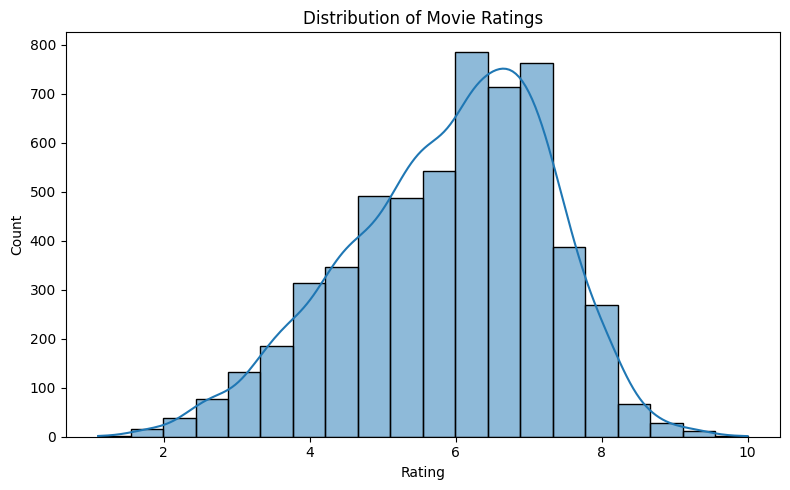

In [ ]:
# 1️ Rating Distribution
plt.figure(figsize=(8,5))
sns.histplot(df_movie['Rating'], bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


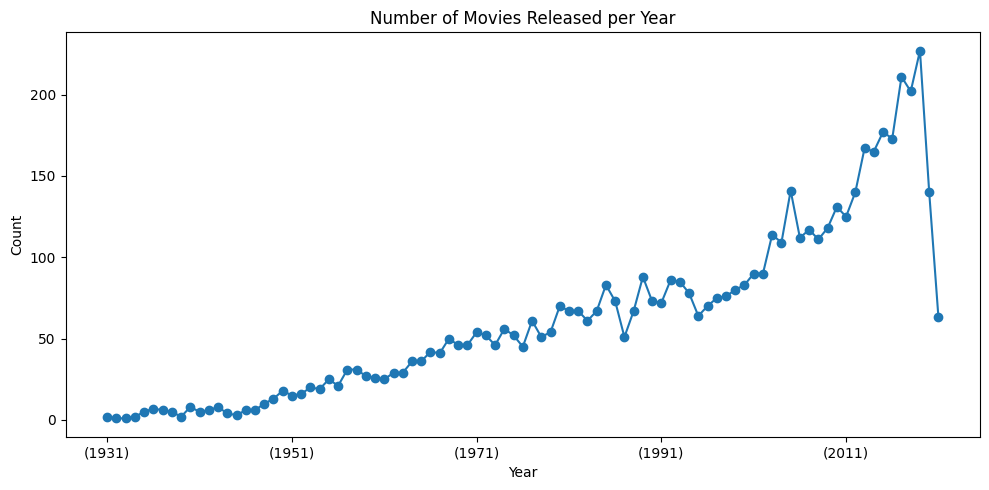

In [10]:
year_count = df_movie['Year'].value_counts().sort_index()
plt.figure(figsize=(10,5))
year_count.plot(kind='line', marker='o')
plt.title('Number of Movies Released per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.tight_layout()
plt.show()



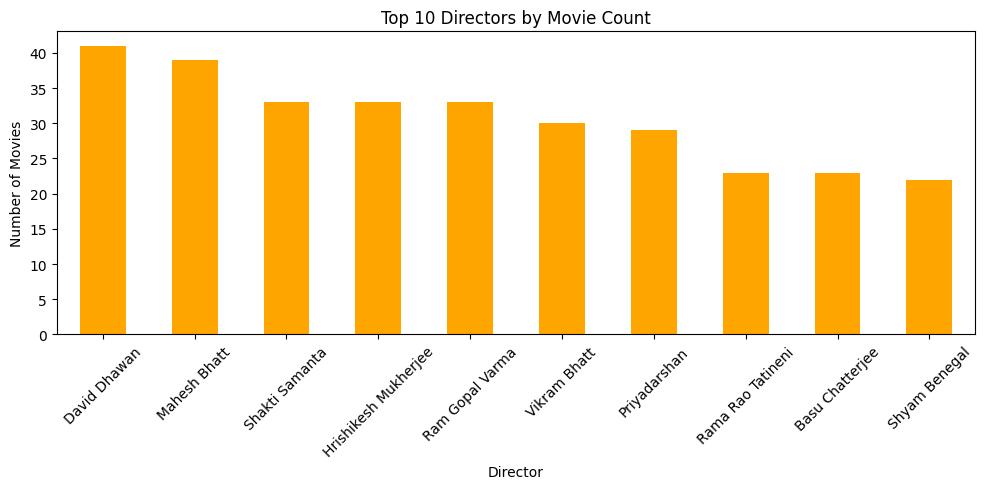

In [ ]:
# 5️ Top 10 Directors by Movie Count
top_directors = df_movie['Director'].value_counts().head(10)
plt.figure(figsize=(10,5))
top_directors.plot(kind='bar', color='orange')
plt.title('Top 10 Directors by Movie Count')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [13]:
#replacing the bracket from year column
df_movie['Year']= df_movie['Year'].str.replace(r'[()]','',regex =True).astype(int)

In [14]:
#removing the min string from theh duration
df_movie['Duration'] = pd.to_numeric(df_movie['Duration'].str.replace('min',''))

In [15]:
#splitting the gener by , to keep only unique geners and replacing the null values with mode
## Split and explode the 'Genre' column
df_movie['Genre'] = df_movie['Genre'].str.split(',')
df_movie = df_movie.explode('Genre')

# Strip whitespace
df_movie['Genre'] = df_movie['Genre'].str.strip()

# Handle missing values safely
if not df_movie['Genre'].mode().empty:
    most_common_genre = df_movie['Genre'].mode().iloc[0]
    df_movie['Genre'].fillna(most_common_genre, inplace=True)
else:
    df_movie['Genre'].fillna('Unknown', inplace=True)  # Fallback if mode is empty

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15648\2376932283.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_movie['Genre'].fillna(most_common_genre, inplace=True)


In [16]:
#convert votes to numeric 
df_movie['Votes' ]= pd.to_numeric(df_movie['Votes'].str.replace(',',''))

In [17]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11979 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      11979 non-null  object 
 1   Year      11979 non-null  int64  
 2   Duration  11979 non-null  int64  
 3   Genre     11979 non-null  object 
 4   Rating    11979 non-null  float64
 5   Votes     11979 non-null  int64  
 6   Director  11979 non-null  object 
 7   Actor 1   11979 non-null  object 
 8   Actor 2   11979 non-null  object 
 9   Actor 3   11979 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 1.0+ MB


model training 

In [18]:
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import accuracy_score , mean_absolute_error , mean_squared_error , r2_score

In [19]:
df_movie.drop('Name', axis=1 ,inplace =True)


In [20]:
print(df_movie.columns.tolist())

['Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']


In [21]:
df_movie['genre_mean_rating'] = df_movie.groupby('Genre')['Rating'].transform('mean')
df_movie['director_encoded'] = df_movie.groupby('Director')['Rating'].transform('mean')
df_movie['actor1_encoded'] = df_movie.groupby('Actor 1')['Rating'].transform('mean')
df_movie['actor2_encoded'] = df_movie.groupby('Actor 2')['Rating'].transform('mean')
df_movie['actor3_encoded'] = df_movie.groupby('Actor 3')['Rating'].transform('mean')

In [22]:
x = df_movie[['Year', 'Votes','Duration','genre_mean_rating','director_encoded','actor1_encoded','actor2_encoded', 'actor3_encoded']]
y = df_movie['Rating']

In [23]:
X_train ,X_test , y_train, y_test = train_test_split(x ,y, test_size =0.2, random_state=42) 

In [24]:
model = LinearRegression()
model.fit(X_train , y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [25]:
model_pred = model.predict(X_test)

In [26]:
print("the performance evalution of logistic regression is below :",'\n')
print('Mean squared error :' ,mean_squared_error(y_test ,model_pred) )
print('Mean absolute error :' , mean_absolute_error(y_test , model_pred))
print('R2 score:', r2_score(y_test ,model_pred))

the performance evalution of logistic regression is below : 

Mean squared error : 0.4465441653985704
Mean absolute error : 0.4921902540765641
R2 score: 0.7641133663863862


In [27]:
x.head(5)

,Year,Votes,Duration,genre_mean_rating,director_encoded,actor1_encoded,actor2_encoded,actor3_encoded
1,2019,8,109,6.056744,7.000000,6.850000,7.00,7.00
3,2019,35,110,5.751042,4.400000,5.250000,4.40,4.46
3,2019,35,110,5.811087,4.400000,5.250000,4.40,4.46
5,1997,827,147,5.751042,5.335135,4.793617,5.73,5.93
5,1997,827,147,6.056744,5.335135,4.793617,5.73,5.93


In [28]:
y.head(5)

1    7.0
3    4.4
3    4.4
5    4.7
5    4.7
Name: Rating, dtype: float64

In [29]:
#testing 
data ={'Year':[2019],'Votes':[35],	'Duration':[110],'genre_mean_rating':[5.75],'director_encoded':[4.40],	'actor1_encoded':[5.250],	'actor2_encoded':[4.40],'actor3_encoded':[4.46]}
trail = pd.DataFrame(data)


In [ ]:
rating_prediction = model.predict(trail)
print("Predicted Ratinig :", rating_prediction[0])#final testing 

Predicted Ratinig : 4.106064069027226


model creating 

In [32]:
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [33]:
import joblib as jb
jb.dump(model , "movie_rating-_prediction.pkl")

['movie_rating-_prediction.pkl']

In [34]:
from sklearn.preprocessing import LabelEncoder
import joblib

# Assuming df is your training DataFrame
director_encoder = LabelEncoder()
df_movie["director_encoded"] = director_encoder.fit_transform(df_movie["Director"])

actor_encoder = LabelEncoder()
df_movie["actor1_encoded"] = actor_encoder.fit_transform(df_movie["Actor 1"])
df_movie["actor2_encoded"] = actor_encoder.fit_transform(df_movie["Actor 2"])
df_movie["actor3_encoded"] = actor_encoder.fit_transform(df_movie["Actor 3"])

# Save the encoders
joblib.dump(director_encoder, "director_encoder.pkl")
joblib.dump(actor_encoder, "actor_encoder.pkl")

['actor_encoder.pkl']

In [35]:
genre_rating_map = df_movie.groupby("Genre")["Rating"].mean().to_dict()
joblib.dump(genre_rating_map, "genre_rating_map.pkl")

['genre_rating_map.pkl']

In [36]:
def safe_transform(encoder, label):
    try:
        return encoder.transform([label])[0]
    except ValueError:
        return -1  # or len(encoder.classes_) if you want to add a new index

In [37]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)